<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

## ET5003_CS6134  Machine Learning Applications
## SEM1 2022/3

### ET5003_CS6134 Etivity 2 - Building a Bayesian Network on a Real-Life Scenario

### Instructor: Emil Vassev
October 3rd, 2022
<br><br>
Copyright (C) 2022 - All rights reserved, do not copy or distribute without permission of the author.
***

## Submission Info
### Student Name: <span style="color:red">Sorin</span>
### Student Surname: <span style="color:red">Slavescu</span>
### Student ID: <span style="color:red">21185131</span>
### Date of Final Submission: <span style="color:red">16/10/2022</span>
***

### Task
In this e-tivity, you are asked to build a Bayesian Network by following the steps outlined in the interactive lesson “Notebook Lesson: Building Bayesian Networks with Python”. This Bayesian Network needs to cover a real-life scenario, which is a modified version of the “Recommendation Letter” example provided by the lectures. 

## The real-life scenario
Let’s suppose that a UL student is taking the ET5003 module “Machine Learning Applications”. The student’s grade for this module will depend on their intelligence (low or high), module difficulty (easy, hard), and their health status (sick or healthy). Our student asks their professor for a recommendation letter. To come up with the idea of the quality of that recommendation letter (weak or strong), the professor can only look at the student’s grade (A, B or C) and the student’s forum activity (not active, active). Hence, the actual quality of the letter depends stochastically on the grade and on the forum activity. 

### Here are the steps you need to follow:

## Step 1: Create the DAG of the Bayesian Network (20%)

### Step 1.1. Describe the problem (5%)
Outline the problem in terms of:
<ul>
<li>random variables and their domain</li>
<li>dependencies among these random variables</li>
<ul>

Random variables are:
- Module Dificulty $X_d$ = {easy, hard}
- Health  $X_h$ = {sick, healthy}
- Intelligence $X_i$ = {low, high}
- Grades $X_g$ = {A, B, C}
- Forum $X_f$ = {inactive, active}
- Letter $X_l$ = {weak, strong}

Student's grade depends on their Intelligence, Health and Module Difficulty
The recommendation letter depends on Grade and Forum Activity

### Step 1.2. Draw and show the DAG (7%)

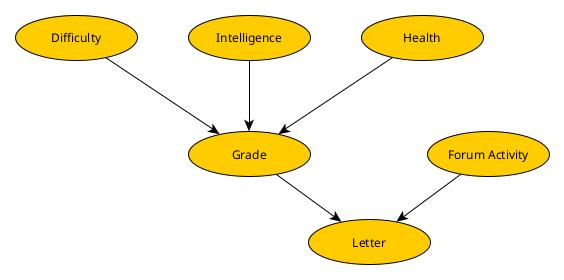

In [4]:
from IPython.display import Image

Image("images/dag.jpg")

### Step 1.3. Create the DAG of the Bayesian Network by using the pgmpy library (7%)

In [8]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
import networkx as nx
import pylab as plt

model = BayesianNetwork([('diff', 'grade'), ('health', 'grade'), ('intel', 'grade'), 
                         ('grade', 'letter'), ('forum_act', 'letter')])

### Step 1.4. Show the DAG of the Bayesian Network (1%)

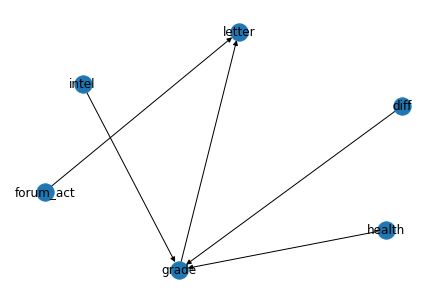

In [9]:
# your code goes here
nx.draw(model, with_labels=True)
plt.show()
plt.close()

## Step 2: Create the Conditional Probability Distributions of the Bayesian Network (50%)

### Step 2.1: Build the probability distribution tables with TabularCPD (46%)

In [10]:
#Create CPDs for each random variable
# 30% of modules are easy
diff_cpd = TabularCPD('diff', 2, [[0.3], [0.7]])

# 40% of students have low intelligence
intel_cpd = TabularCPD('intel', 2, [[0.4], [0.6]])

# 20% of students are sick
health_cpd = TabularCPD('health', 2, [[0.2], [0.8]])

The Grade conditional distribution is captured below P(Grade | Intel ∩ Diff ∩ Health)

    +---------+------+------+------+------+------+------+------+------+
    | health  |           sick            |          healthy          |
    +---------+------+------+------+------+------+------+------+------+
    | diff    |     easy    |    hard     |     easy    |    hard     |
    +---------+------+------+------+------+------+------+------+------+
    | intel   | low  | high | low  | high | low  | high | low  | high |
    +---------+------+------+------+------+------+------+------+------+
    | grade_0 | 0.05 | 0.3  | 0.01 | 0.2  | 0.2  | 0.9  | 0.1  | 0.7  |
    +---------+------+------+------+------+------+------+------+------+
    | grade_1 | 0.05 | 0.4  | 0.05 | 0.3  | 0.3  | 0.08 | 0.2  | 0.2  |
    +---------+------+------+------+------+------+------+------+------+
    | grade_2 | 0.9  | 0.3  | 0.94 | 0.5  | 0.5  | 0.02 | 0.7  | 0.1  |
    +---------+------+------+------+------+------+------+------+------+

In [16]:
grade_cpd = TabularCPD (
    variable="grade",
    variable_card=3,
    values=[
        [0.05, 0.3, 0.01, 0.2, 0.2, 0.9 , 0.1, 0.7],
        [0.05, 0.4, 0.05, 0.3, 0.3, 0.08, 0.2, 0.2],
        [0.9 , 0.3, 0.94, 0.5, 0.5, 0.02, 0.7, 0.1]
    ],

    # define the evidences
    evidence=["health", "diff", "intel"],
    evidence_card=[2,2,2]
)

In [17]:
# 20% of students are inactive in the forum
forum_act_cpd = TabularCPD('forum_act', 2, [[0.2], [0.8]])

The Letter conditional distribution P(Letter | Grade ∩ Forum Activity)

    +-----------+------+------+------+------+------+------+
    | forum_act |      inactive      |       active       |
    +-----------+------+------+------+------+------+------+
    |   grade   |  A   |  B   |  C   |   A  |   B  |  C   |
    +-----------+------+------+------+------+------+------+
    |   weak    | 0.3  | 0.6  | 0.9  | 0.05 | 0.2  | 0.4  |
    +-----------+------+------+------+------+------+------+
    |  strong   | 0.7  | 0.4  | 0.1  | 0.95 | 0.8  | 0.6  |
    +-----------+------+------+------+------+------+------+

In [18]:
letter_cpd = TabularCPD (
    variable="letter",
    variable_card=2,
    values=[
        [0.3 ,0.6 ,0.9 ,0.05 ,0.2 ,0.4 ],
        [0.7 ,0.4, 0.1, 0.95 ,0.8, 0.6 ]
    ],

    # define the evidences
    evidence=["forum_act", "grade"],
    evidence_card=[2,3]
)

### Step 2.2: Associate the distribution models with the network structure (2%)

In [19]:
model.add_cpds(diff_cpd, intel_cpd, health_cpd, grade_cpd, forum_act_cpd, letter_cpd)

### Step 2.3: Check the model (2%)

In [21]:
model.check_model()

True

## Step 3: Inference with the Bayesian Network (30%)

In [24]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(model)

### Step 3.1: Infer Posterior Probability of having a grade A if the evidence is a strong recommendation letter (10%)

In [25]:
# your code goes here
#Probability of Grade A when Letter is Strong P(G | L) = P(G)*P(G and L)/P(L)
posterior_g = infer.query(['grade'], evidence={'letter': 1})

In [26]:
# show the posterior probability results
# your code goes here
print(posterior_g)

+----------+--------------+
| grade    |   phi(grade) |
+==========+==============+
| grade(0) |       0.5467 |
+----------+--------------+
| grade(1) |       0.1966 |
+----------+--------------+
| grade(2) |       0.2567 |
+----------+--------------+


### Step 3.2: Infer Prior Probability of having a strong recommendation letter with no evidence (10%)

In [27]:
# your code goes here
prior_l = infer.query(['letter'], evidence={})

In [28]:
# show the prior probability results
# your code goes here
print(prior_l)

+-----------+---------------+
| letter    |   phi(letter) |
+===========+===============+
| letter(0) |        0.2826 |
+-----------+---------------+
| letter(1) |        0.7174 |
+-----------+---------------+


### Step 3.3: Infer Prior Probability of having a strong recommendation letter with a weak forum activity as a prior evidence (10%)

In [31]:
# your code goes here
prior_ls = infer.query(['letter'], evidence={'forum_act': 0})

In [32]:
# show the prior probability results
# your code goes here
print(prior_ls)

+-----------+---------------+
| letter    |   phi(letter) |
+===========+===============+
| letter(0) |        0.5798 |
+-----------+---------------+
| letter(1) |        0.4202 |
+-----------+---------------+
